In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from printer_anomaly_detection.model.cae import CAE
from pathlib import Path
import tensorflow as tf
from printer_anomaly_detection.dataset.audio import get_normalization_stats


project_path = Path('../../../../')
dataset_path = project_path / 'datasets' / 'prints'

mean, var = get_normalization_stats(dataset_path, 'original')


model = CAE(latent_dim=256, activation='tanh', renorm=False, mean=mean, var=var)

#aktuell okaaay: model.load_weights(project_path / 'checkpoints' / '2023-06-22T18:30:06-test-8447b88-58fe5f66ecb0'/ 'test-8447b88.104-0.2849.h5')
model.load_weights(project_path / 'checkpoints' / '2023-06-22T22:07:01-test-31d7553'/ 'test-31d7553.231-0.3521.h5')
#checkpoint = tf.train.Checkpoint(model)
#checkpoint.restore(project_path / 'checkpoints' / '')


In [40]:
from printer_anomaly_detection.dataset.audio import Split, load_audio_dataset_split


dataset_path = project_path / 'datasets' / 'prints'

dataset = load_audio_dataset_split(dataset_path, 'original', Split.TRAIN, window_size=256, step_size=32)

In [41]:
images = dataset.batch(1000).take(1)

In [42]:
images = images.as_numpy_iterator().next()

2023-06-23 16:21:47.892690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


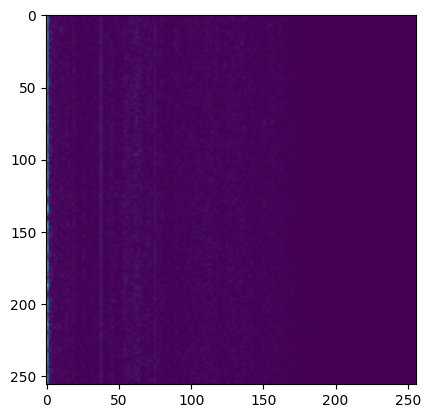

In [43]:
from matplotlib import pyplot as plt


plt.imshow(images[150])

In [44]:
result = model.predict(images)

32/32 [==============================] - 1s 12ms/step


In [50]:
np.max(images[i]), np.max(result[i])

(3.2513256, 0.096786276)

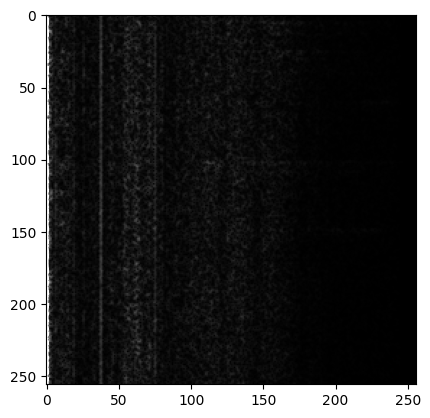

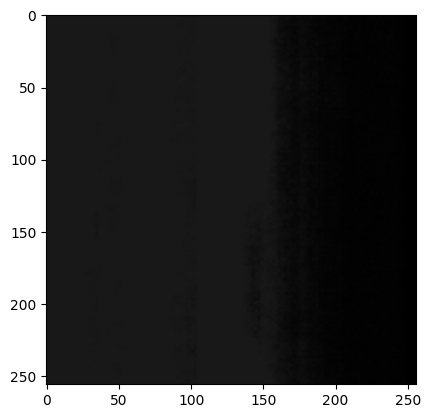

In [49]:
i = 190
from matplotlib.colors import NoNorm
import numpy as np
plt.imshow(images[i], cmap="gray", norm=NoNorm())
plt.show()
plt.imshow(result[i], cmap="gray", norm=NoNorm())

In [46]:
import numpy as np 

np.linalg.norm(result[0] - images[0])

792.25684

In [47]:
np.max(result[0]), np.max(images[0])

(0.09678419, 7.2920275)